Load data

In [26]:
import pandas as pd

In [27]:
data = pd.read_csv('application_train.csv')
data.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15482,118070,0,Cash loans,F,N,Y,0,157500.0,1067418.0,31338.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.shape

(307511, 122)

In [29]:
import fancyimpute

## Preprocessing

Make a copy so that we can always go back to the original data.  

In [30]:
df = data.copy()
df = df.rename(columns=lambda x: x.lower())
df.sample()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
74033,185852,0,Revolving loans,F,Y,Y,0,85500.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


We decided to keep only those few columns that are strongly correlated with the target.  We had decided on the following features/columns.  

In [31]:
col_num = ['ext_source_3',
           'ext_source_2',
           'ext_source_1',
           'days_birth',
           'region_rating_client_w_city',
           'days_last_phone_change',
           'days_id_publish',
           'reg_city_not_work_city',
           'flag_emp_phone',
           'reg_city_not_live_city',
           'flag_document_3',
           'floorsmax_avg'
          ]

col_cat = ['name_education_type',
           'name_income_type']

Ensure that the column names are spelled correctly.  

continuous

In [32]:
sum(col in df.columns for col in col_num) == len(col_num)

True

discrete

In [33]:
sum(col in df.columns for col in col_cat) == len(col_cat)

True

And these are all we need ... for now.  

In [34]:
cols = col_num + col_cat + ['target']
len(cols)

15

In [35]:
df = df[cols]
df.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,flag_document_3,floorsmax_avg,name_education_type,name_income_type,target
253499,0.722393,0.558906,0.552615,-13643,2,-1072.0,-3128,1,1,0,1,0.0417,Secondary / secondary special,Working,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 15 columns):
ext_source_3                   246546 non-null float64
ext_source_2                   306851 non-null float64
ext_source_1                   134133 non-null float64
days_birth                     307511 non-null int64
region_rating_client_w_city    307511 non-null int64
days_last_phone_change         307510 non-null float64
days_id_publish                307511 non-null int64
reg_city_not_work_city         307511 non-null int64
flag_emp_phone                 307511 non-null int64
reg_city_not_live_city         307511 non-null int64
flag_document_3                307511 non-null int64
floorsmax_avg                  154491 non-null float64
name_education_type            307511 non-null object
name_income_type               307511 non-null object
target                         307511 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 35.2+ MB


Looks like some of the columns have missing values.  (We already knew this!)  Let's just collect the names in a list and then analyze.  

### Imputating missing values

In [37]:
has_null = [col for col in df.columns 
            if sum(df[col].isnull())]

len(has_null)

5

In [38]:
df[has_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 5 columns):
ext_source_3              246546 non-null float64
ext_source_2              306851 non-null float64
ext_source_1              134133 non-null float64
days_last_phone_change    307510 non-null float64
floorsmax_avg             154491 non-null float64
dtypes: float64(5)
memory usage: 11.7 MB


#### Categorical

There are no categorical variables with missing input.  

#### Numerical/Discrete

There are no discrete variables with missing input.  

#### Numerical/Continuous

In [39]:
df[has_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 5 columns):
ext_source_3              246546 non-null float64
ext_source_2              306851 non-null float64
ext_source_1              134133 non-null float64
days_last_phone_change    307510 non-null float64
floorsmax_avg             154491 non-null float64
dtypes: float64(5)
memory usage: 11.7 MB


Let's just drop the row with missing days_last_phone_change.  

In [40]:
index = df.index[df['days_last_phone_change'].isnull()].tolist()[0]
index

15709

In [41]:
df.drop(index=index, inplace=True)

In [42]:
sum(df['days_last_phone_change'].isnull()) == 0

True

We have to encode the categorical columns before we can use (fancy) multiple imputation techniques.  

In [43]:
col_cat = [col for col in df.columns if df[col].dtype == 'object']
col_cat

['name_education_type', 'name_income_type']

In [44]:
for col in col_cat:
    dummy = pd.get_dummies(df[col], prefix=col+'_', drop_first=True)
    df = df.join(dummy)
    
df.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,...,name_education_type__Incomplete higher,name_education_type__Lower secondary,name_education_type__Secondary / secondary special,name_income_type__Commercial associate,name_income_type__Maternity leave,name_income_type__Pensioner,name_income_type__State servant,name_income_type__Student,name_income_type__Unemployed,name_income_type__Working
222434,NaN,0.646414,NaN,-11958,2,-577.0,-2193,0,1,0,...,0,0,1,0,0,0,1,0,0,0


Now drop the categorical columns.  

In [45]:
df = df.drop(col_cat, axis=1)
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 24 columns):
ext_source_3                                          246546 non-null float64
ext_source_2                                          306851 non-null float64
ext_source_1                                          134133 non-null float64
days_birth                                            307510 non-null int64
region_rating_client_w_city                           307510 non-null int64
days_last_phone_change                                307510 non-null float64
days_id_publish                                       307510 non-null int64
reg_city_not_work_city                                307510 non-null int64
flag_emp_phone                                        307510 non-null int64
reg_city_not_live_city                                307510 non-null int64
flag_document_3                                       307510 non-null int64
floorsmax_avg                                

In [22]:
# Use 3 nearest rows which have a feature to fill in each row's missing features
# X_filled_knn = KNN(k=3).complete(X_incomplete)

# matrix completion using convex optimization to find low-rank solution
# that still matches observed values. Slow!
# X_filled_nnm = NuclearNormMinimization().complete(X_incomplete)

# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
# X_filled_softimpute = SoftImpute().complete(X_incomplete_normalized)

# Multiple Imputation by Chained Equations
# fancyimpute.MICE().complete(data matrix)

# print mean squared error for the three imputation methods above
# nnm_mse = ((X_filled_nnm[missing_mask] - X[missing_mask]) ** 2).mean()
# print("Nuclear norm minimization MSE: %f" % nnm_mse)

# softImpute_mse = ((X_filled_softimpute[missing_mask] - X[missing_mask]) ** 2).mean()
# print("SoftImpute MSE: %f" % softImpute_mse)

# knn_mse = ((X_filled_knn[missing_mask] - X[missing_mask]) ** 2).mean()
# print("knnImpute MSE: %f" % knn_mse)

In [23]:
X = fancyimpute.MICE().complete(df);

[MICE] Completing matrix with shape (307510, 24)
[MICE] Starting imputation round 1/110, elapsed time 0.114
[MICE] Starting imputation round 2/110, elapsed time 1.616
[MICE] Starting imputation round 3/110, elapsed time 2.480
[MICE] Starting imputation round 4/110, elapsed time 3.322
[MICE] Starting imputation round 5/110, elapsed time 4.046
[MICE] Starting imputation round 6/110, elapsed time 4.778
[MICE] Starting imputation round 7/110, elapsed time 5.454
[MICE] Starting imputation round 8/110, elapsed time 6.227
[MICE] Starting imputation round 9/110, elapsed time 7.013
[MICE] Starting imputation round 10/110, elapsed time 7.739
[MICE] Starting imputation round 11/110, elapsed time 8.608
[MICE] Starting imputation round 12/110, elapsed time 9.543
[MICE] Starting imputation round 13/110, elapsed time 10.718
[MICE] Starting imputation round 14/110, elapsed time 11.599
[MICE] Starting imputation round 15/110, elapsed time 12.374
[MICE] Starting imputation round 16/110, elapsed time 13.

First convert it back to a DataFrame.  

In [47]:
df_mice = pd.DataFrame(X, columns=df.columns)
df_mice.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,...,name_education_type__Incomplete higher,name_education_type__Lower secondary,name_education_type__Secondary / secondary special,name_income_type__Commercial associate,name_income_type__Maternity leave,name_income_type__Pensioner,name_income_type__State servant,name_income_type__Student,name_income_type__Unemployed,name_income_type__Working
204448,0.719491,0.500204,0.354311,-10671.0,2.0,0.0,-3304.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
df_mice['target'] = df_mice['target'].astype(int)

Let's just check that there is no missing value.  

In [49]:
has_null = [col for col in df_mice.columns 
            if sum(df_mice[col].isnull())]

len(has_null)

0

Modeling time!!  

### Encoding categorical columns (OneHotEncoding)

Done!  

### Subsampling

In [64]:
df_mice['target'].value_counts()

0    282685
1     24825
Name: target, dtype: int64

In [65]:
ones = (df_mice['target'] == 1).sum()
ones

24825

In [66]:
df_mice_0 = df_mice[df_mice['target'] == 0].sample(ones)
df_mice_0.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,...,name_education_type__Incomplete higher,name_education_type__Lower secondary,name_education_type__Secondary / secondary special,name_income_type__Commercial associate,name_income_type__Maternity leave,name_income_type__Pensioner,name_income_type__State servant,name_income_type__Student,name_income_type__Unemployed,name_income_type__Working
189292,0.461482,0.719119,0.522604,-15490.0,2.0,-985.0,-4361.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
df_mice_0.shape

(24825, 24)

In [69]:
df_sub = df_mice_0.append(df_mice[df_mice['target'] == 1])
df_sub = pd.DataFrame(df_sub)
df_sub.sample()

,ext_source_3,ext_source_2,ext_source_1,days_birth,region_rating_client_w_city,days_last_phone_change,days_id_publish,reg_city_not_work_city,flag_emp_phone,reg_city_not_live_city,...,name_education_type__Incomplete higher,name_education_type__Lower secondary,name_education_type__Secondary / secondary special,name_income_type__Commercial associate,name_income_type__Maternity leave,name_income_type__Pensioner,name_income_type__State servant,name_income_type__Student,name_income_type__Unemployed,name_income_type__Working
45296,0.567379,0.704292,0.678423,-16874.0,1.0,-9.0,-399.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df_sub.shape

(49650, 24)

### Training set

In [79]:
y = df_sub['target']
y.shape

(49650,)

In [80]:
X = df_sub.drop('target', axis=1)
X.shape

(49650, 23)

In [108]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

## Modeling and evaluation  

### Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
ypred = gnb.predict(Xtest)

In [111]:
accuracy_score(ytest, ypred)

0.6295818899540804

In [112]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[3572, 2614],
       [1984, 4243]])

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

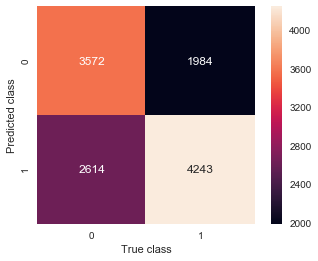

In [114]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [115]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, ypred)

0.6294102095257914

### Logistic regression

In [116]:
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

In [117]:
accuracy_score(ytest, ypred)

0.6735680335132522

In [118]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[4209, 1977],
       [2075, 4152]])

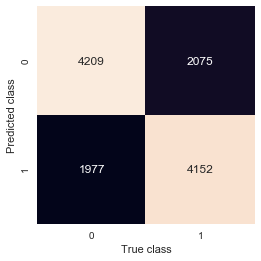

In [119]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=False,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [120]:
roc_auc_score(ytest, ypred)

0.6735905494002604

### Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [122]:
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)

In [123]:
accuracy_score(ytest, ypred)

0.632965439458632

In [124]:
con_mat = confusion_matrix(ytest, ypred)
con_mat

array([[4371, 1815],
       [2741, 3486]])

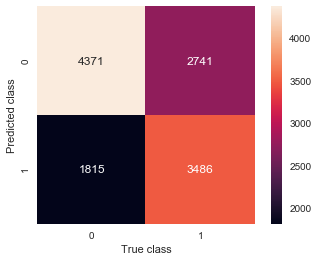

In [125]:
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [126]:
roc_auc_score(ytest, ypred)

0.6332078382102782

### adaboost

In [127]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(Xtrain, ytrain)
ypred = abc.predict(Xtest)

In [128]:
accuracy_score(ytest, ypred)

0.6709900910335939

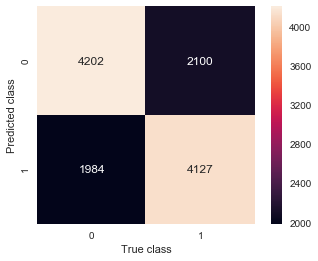

In [129]:
con_mat = confusion_matrix(ytest, ypred)
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [131]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.67      0.68      0.67      6186
          1       0.68      0.66      0.67      6227

avg / total       0.67      0.67      0.67     12413



In [132]:
roc_auc_score(ytest, ypred)

0.6710173684876478

#### GBT 

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1000)
gbc.fit(Xtrain, ytrain)
ypred = gbc.predict(Xtest)

In [156]:
accuracy_score(ytest, ypred)

0.6660758881817449

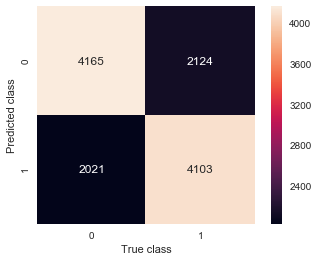

In [157]:
con_mat = confusion_matrix(ytest, ypred)
sns.heatmap(con_mat.T, 
            square=True, 
            annot=True, 
            fmt='d', 
            cbar=True,
            xticklabels=[0, 1], 
            yticklabels=[0, 1])

plt.xlabel('True class')
plt.ylabel('Predicted class');

In [158]:
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.66      0.67      0.67      6186
          1       0.67      0.66      0.66      6227

avg / total       0.67      0.67      0.67     12413



In [159]:
print(roc_auc_score(ytest, ypred))

0.6660996528005473


In [140]:
fi = pd.DataFrame({'variable': list(Xtrain.columns), 
                   'importance': gbc.feature_importances_})

fi = fi.sort_values(by='importance', ascending=False)
fi.head()

,importance,variable
0,0.196861,ext_source_3
2,0.185916,ext_source_1
1,0.156244,ext_source_2
3,0.144839,days_birth
6,0.068542,days_id_publish


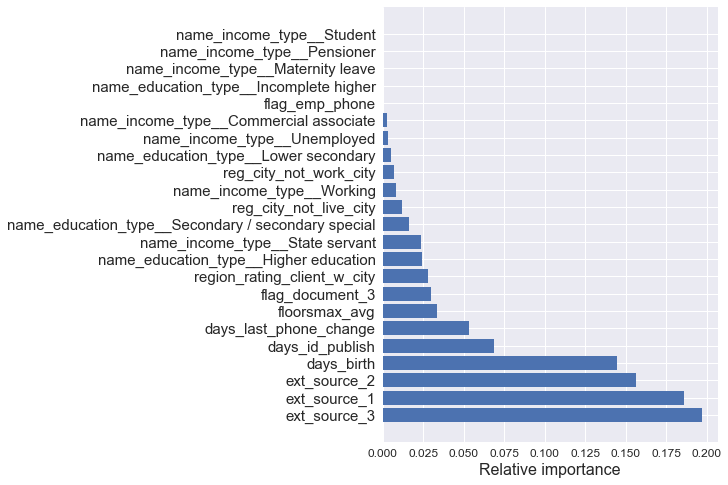

In [141]:
how_many = fi.shape[0]
plt.figure(figsize=(6,8))
plt.barh(range(how_many), fi['importance'].head(how_many))
plt.yticks(range(how_many), fi['variable'].head(how_many), size=15)
plt.xticks(size=12)
plt.xlabel('Relative importance', size=16)
plt.show()

Keeping all the externals actually gave us a better score!  

## Hyperparameter tuning

#### Logistic Regression

In [150]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.10, 1.0, 10., 100.],
              'fit_intercept': [False, True],
              'max_iter': [50, 100, 200]}

gs = GridSearchCV(estimator=LogisticRegression(),
                 param_grid = param_grid,
                 scoring='f1',
                 cv=5)

gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1.0, 10.0, 100.0], 'fit_intercept': [False, True], 'max_iter': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Best parameters

In [151]:
gs.best_params_

{'C': 100.0, 'fit_intercept': True, 'max_iter': 200, 'penalty': 'l1'}

Best estimator

In [152]:
gs.best_estimator_

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

ROC score

In [153]:
model = gs.best_estimator_
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
roc_auc_score(ytest, ypred)

0.674638648240397

#### GBT

In [146]:
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
param_grid = [{'learning_rate': [0.1, 1.0]},
              {'n_estimators': [100, 200]},
              {'max_depth': [3, 5, 7]}]

gs = GridSearchCV(gbc, 
                 param_grid,
                 cv=5,
                 scoring='f1')

gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': [0.1, 1.0]}, {'n_estimators': [100, 200]}, {'max_depth': [3, 5, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

Best parameters

In [147]:
gs.best_params_

{'n_estimators': 200}

Best estimator

In [148]:
gs.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

ROC score

In [149]:
model = gs.best_estimator_
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
roc_auc_score(ytest, ypred)

0.6715815656514129

In [154]:
model = GradientBoostingClassifier(n_estimators=1200)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
roc_auc_score(ytest, ypred)

0.6642459381464624